## Dataset Humsavar 

In [1]:
hum <- read.table("~/workspace/master-thesis/data/processed/1/humsavar_full_gt.csv.gz", sep=",", header=TRUE)

In [3]:
dataset <- read.table("../data/processed//1/dataset.csv.gz", sep=",", header=TRUE)

### Dimensionality Reduction

### Correlations

In [2]:
library('corrplot')
library('RColorBrewer')

corrplot 0.84 loaded


In [3]:
Mpearson <- cor(hum[sapply(hum, is.numeric)], method="pearson", use="complete.obs")
Mspearman <- cor(hum[sapply(hum, is.numeric)], method="spearman", use="complete.obs")
pval <- cor.mtest(hum[sapply(hum, is.numeric)], conf.level=.95)$p

In [17]:
pdf("../documents/resources/corrplot_1.pdf", 7, 5)
corrplot(Mpearson, p.mat=pval, insig="blank", method='color', tl.col='black',
         diag=FALSE, tl.srt=90, tl.cex=0.6, sig.level=.05,
         col=rev(brewer.pal(n=8, name="RdYlBu"))) 
dev.off()

png 
  2

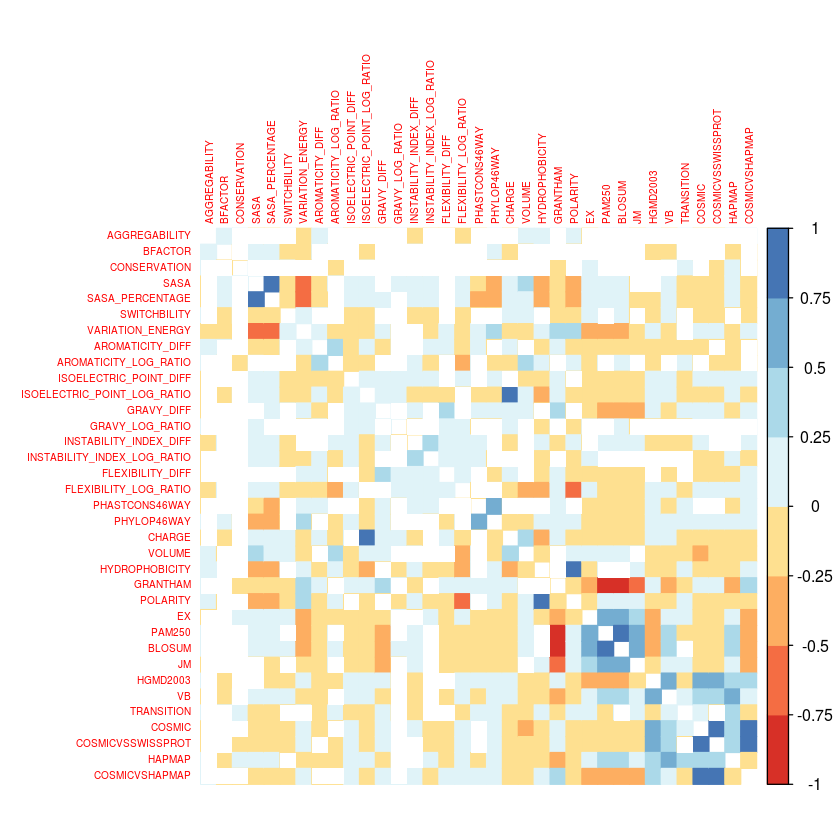

In [40]:
corrplot(Mspearman, p.mat=pval, insig="blank", method='color',
         diag=FALSE, tl.srt=90, tl.cex=0.5, sig.level=.05,
         col = brewer.pal(n = 8, name = "RdYlBu"))

### AUC Curves

In [15]:
library('pROC')
library('pracma')

ERROR: Error in library("pracma"): there is no package called ‘pracma’


In [18]:
mean_tpr <- colMeans(read.table("../results/humsavar/rf_tprs.csv", sep=",", header=TRUE))
mean_fpr <- seq(0, 1, length=100)

In [6]:
help(roc)

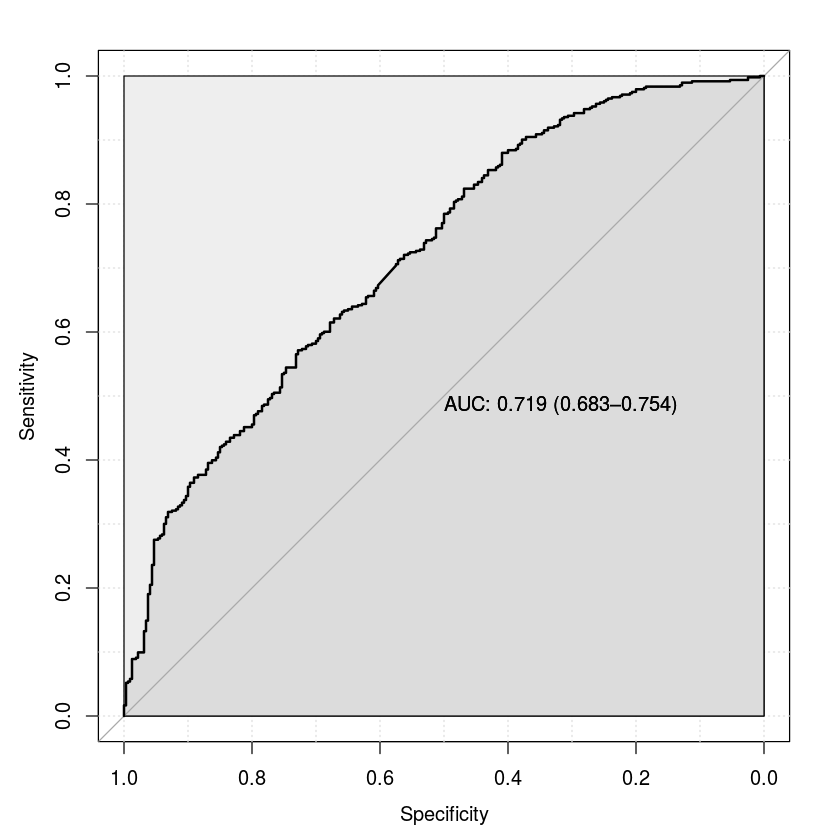

In [24]:
roc <- roc(results$y_true, results$score,
    ci=TRUE, boot.n=100, ci.alpha=0.9, stratified=FALSE,
    # arguments for plot
    plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
    print.auc=TRUE, show.thres=TRUE)